Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction and classification technique used in machine learning and statistics. Its primary purpose is to reduce the dimensionality of a dataset while maximizing the separation between different classes or groups. LDA is particularly useful when you want to improve the separability of different classes in a classification problem.

Key features and concepts of Linear Discriminant Analysis (LDA):

1. **Supervised Learning:** LDA is a supervised learning method, meaning it takes into account class labels. It's typically used in classification tasks where you have labeled data, and you want to reduce the dimensionality of the data while maintaining or improving class separability.

2. **Dimensionality Reduction:** LDA transforms the original features (variables) into a lower-dimensional subspace. This transformation is achieved by finding linear combinations of the original features (linear discriminants) that maximize the ratio of between-class variance to within-class variance.

3. **Goal:** The primary goal of LDA is to project data points onto a lower-dimensional space in a way that maximizes the separation between different classes or groups. It achieves this by considering both the spread of data within individual classes and the separation between classes.

4. **Between-Class and Within-Class Scatter:** LDA calculates two scatter matrices:
   - **Within-Class Scatter Matrix (Sw):** Measures the spread of data within individual classes and quantifies the variance of the data within each class.
   - **Between-Class Scatter Matrix (Sb):** Measures the separation between classes and quantifies how much the class means differ from each other.

5. **Eigenvalue Decomposition:** LDA then computes the eigenvalues and eigenvectors of the matrix Sw^-1 * Sb. The eigenvectors corresponding to the largest eigenvalues are chosen as the new feature vectors in the transformed space.

6. **Feature Selection:** The number of eigenvectors you select depends on the number of classes and the dimensionality reduction you desire. Typically, you choose the top eigenvalues and their corresponding eigenvectors.

7. **Classification:** After applying LDA, the reduced feature space can be used for classification tasks. Popular classifiers like logistic regression or support vector machines can be trained on the transformed data.

LDA is valuable when you have high-dimensional data and you want to improve the performance of a classification model by reducing the number of features. It focuses on maximizing the separability of different classes and can be applied in various fields, including image recognition, face recognition, and other classification tasks.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [5]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'data',
 'descr',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerb

In [3]:
digits=datasets.load_digits()

In [6]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

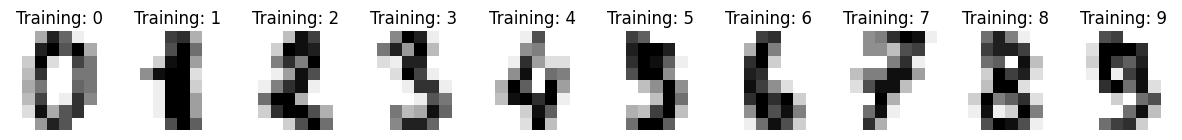

In [36]:
#plotting a sample from the data
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 5))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [29]:
#eg of zip
names=['rohan','akshay','chirag']
scores= [90,85,78]
pairs=zip(names,scores)
print(pairs)

In [30]:
for name,score in pairs:
  print(f"{name}:{score} points")

rohan:90 points
akshay:85 points
chirag:78 points


In [37]:
digits.data.shape

(1797, 64)

In [41]:
X=digits.data
y=digits.target
X.shape

(1797, 64)

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [44]:
X_train.shape

(1437, 64)

In [45]:
#feature scaling
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train.shape

(1437, 64)

In [47]:
#fearure selection
#LDA
lda=LinearDiscriminantAnalysis(n_components=9)
X_train=lda.fit_transform(X_train,y_train)
X_test=lda.transform(X_test)
X_train.shape

(1437, 9)

In [48]:
#model building
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [50]:
#PREDICTION
y_pred=rf.predict(X_test)

In [51]:
#accuracy score
from sklearn.metrics import*


In [52]:
acc=accuracy_score(y_test,y_pred)
acc

0.9583333333333334

In [53]:
y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 3, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 2, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 3, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 4, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 4, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 3, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 9, 1, 5,
       5, 1, 4, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 3, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [55]:
y_test

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.93      0.96      0.95        28
           2       0.97      0.94      0.95        33
           3       0.87      0.97      0.92        34
           4       0.94      1.00      0.97        46
           5       0.98      0.96      0.97        47
           6       1.00      0.97      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.90      0.95        30
           9       0.93      0.95      0.94        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [58]:
import pandas as pd

In [59]:
data=pd.read_csv('/content/nba_final.csv')

In [60]:
data.head()

,Rk,Player.x,Player_ID,Pos1,Pos2,Age,Tm,G,GS,MP,...,Conference,Role,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score,Play
0,170,A.J. Hammons,hammoaj01,C,NaN,24,DAL,22,0,7.4,...,West,Front,786,123,NaN,NaN,NaN,NaN,83.5,No
1,58,Aaron Brooks,brookaa01,PG,NaN,32,IND,65,0,13.8,...,Est,Back,2474,64,NaN,NaN,NaN,NaN,48.2,No
2,157,Aaron Gordon,gordoaa01,SF,NaN,21,ORL,80,72,28.7,...,Est,Front,22774,29,NaN,NaN,NaN,NaN,40.0,No
3,352,Adreian Payne,paynead01,PF,NaN,25,MIN,18,0,7.5,...,West,Front,861,120,1.0,52.0,NaN,NaN,75.5,No
4,10,Al-Farouq Aminu,aminual01,PF,NaN,26,POR,61,25,29.1,...,West,Front,4971,69,7.0,23.0,NaN,NaN,42.8,No


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          1408 non-null   int64  
 1   Player.x    1408 non-null   object 
 2   Player_ID   1408 non-null   object 
 3   Pos1        1408 non-null   object 
 4   Pos2        12 non-null     object 
 5   Age         1408 non-null   int64  
 6   Tm          1408 non-null   object 
 7   G           1408 non-null   int64  
 8   GS          1408 non-null   int64  
 9   MP          1408 non-null   float64
 10  FG          1408 non-null   float64
 11  FGA         1408 non-null   float64
 12  FG.         1404 non-null   float64
 13  X3P         1408 non-null   float64
 14  X3PA        1408 non-null   float64
 15  X3P.        1309 non-null   float64
 16  X2P         1408 non-null   float64
 17  X2PA        1408 non-null   float64
 18  X2P.        1393 non-null   float64
 19  eFG.        1404 non-null  

In [62]:
data.isna().sum()

Rk               0
Player.x         0
Player_ID        0
Pos1             0
Pos2          1396
Age              0
Tm               0
G                0
GS               0
MP               0
FG               0
FGA              0
FG.              4
X3P              0
X3PA             0
X3P.            99
X2P              0
X2PA             0
X2P.            15
eFG.             4
FT               0
FTA              0
FT.             47
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
Salary          62
mean_views     138
Season           0
Conference       0
Role             0
Fvot             0
FRank            0
Pvot           159
PRank          159
Mvot           404
MRank          404
Score            0
Play             0
dtype: int64

In [63]:
data['Pos2']=data['Pos2'].replace(np.nan,'NONE')
data['Pos2'].unique()

array(['NONE', 'C', 'SG', 'SF', 'PF'], dtype=object)

In [64]:
data=data.fillna(0)


In [65]:
data.isna().sum()

Rk            0
Player.x      0
Player_ID     0
Pos1          0
Pos2          0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG.           0
X3P           0
X3PA          0
X3P.          0
X2P           0
X2PA          0
X2P.          0
eFG.          0
FT            0
FTA           0
FT.           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Salary        0
mean_views    0
Season        0
Conference    0
Role          0
Fvot          0
FRank         0
Pvot          0
PRank         0
Mvot          0
MRank         0
Score         0
Play          0
dtype: int64

In [66]:
data.head()

,Rk,Player.x,Player_ID,Pos1,Pos2,Age,Tm,G,GS,MP,...,Conference,Role,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score,Play
0,170,A.J. Hammons,hammoaj01,C,NONE,24,DAL,22,0,7.4,...,West,Front,786,123,0.0,0.0,0.0,0.0,83.5,No
1,58,Aaron Brooks,brookaa01,PG,NONE,32,IND,65,0,13.8,...,Est,Back,2474,64,0.0,0.0,0.0,0.0,48.2,No
2,157,Aaron Gordon,gordoaa01,SF,NONE,21,ORL,80,72,28.7,...,Est,Front,22774,29,0.0,0.0,0.0,0.0,40.0,No
3,352,Adreian Payne,paynead01,PF,NONE,25,MIN,18,0,7.5,...,West,Front,861,120,1.0,52.0,0.0,0.0,75.5,No
4,10,Al-Farouq Aminu,aminual01,PF,NONE,26,POR,61,25,29.1,...,West,Front,4971,69,7.0,23.0,0.0,0.0,42.8,No


In [67]:
data=data.drop(['Player.x','Player_ID'],axis=1)

In [68]:
data.head()

,Rk,Pos1,Pos2,Age,Tm,G,GS,MP,FG,FGA,...,Conference,Role,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score,Play
0,170,C,NONE,24,DAL,22,0,7.4,0.8,1.9,...,West,Front,786,123,0.0,0.0,0.0,0.0,83.5,No
1,58,PG,NONE,32,IND,65,0,13.8,1.9,4.6,...,Est,Back,2474,64,0.0,0.0,0.0,0.0,48.2,No
2,157,SF,NONE,21,ORL,80,72,28.7,4.9,10.8,...,Est,Front,22774,29,0.0,0.0,0.0,0.0,40.0,No
3,352,PF,NONE,25,MIN,18,0,7.5,1.3,3.0,...,West,Front,861,120,1.0,52.0,0.0,0.0,75.5,No
4,10,PF,NONE,26,POR,61,25,29.1,3.0,7.6,...,West,Front,4971,69,7.0,23.0,0.0,0.0,42.8,No


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          1408 non-null   int64  
 1   Pos1        1408 non-null   object 
 2   Pos2        1408 non-null   object 
 3   Age         1408 non-null   int64  
 4   Tm          1408 non-null   object 
 5   G           1408 non-null   int64  
 6   GS          1408 non-null   int64  
 7   MP          1408 non-null   float64
 8   FG          1408 non-null   float64
 9   FGA         1408 non-null   float64
 10  FG.         1408 non-null   float64
 11  X3P         1408 non-null   float64
 12  X3PA        1408 non-null   float64
 13  X3P.        1408 non-null   float64
 14  X2P         1408 non-null   float64
 15  X2PA        1408 non-null   float64
 16  X2P.        1408 non-null   float64
 17  eFG.        1408 non-null   float64
 18  FT          1408 non-null   float64
 19  FTA         1408 non-null  

In [ ]:
#Feature Eng.

In [70]:
from sklearn.preprocessing import LabelEncoder
column_to_encode=['Pos1','Pos2','Tm','Season','Conference','Role','Play']
le=LabelEncoder()
for column in column_to_encode:
  data[column]=le.fit_transform(data[column])

In [71]:
data.head()

,Rk,Pos1,Pos2,Age,Tm,G,GS,MP,FG,FGA,...,Conference,Role,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score,Play
0,170,0,1,24,6,22,0,7.4,0.8,1.9,...,1,1,786,123,0.0,0.0,0.0,0.0,83.5,0
1,58,2,1,32,11,65,0,13.8,1.9,4.6,...,0,0,2474,64,0.0,0.0,0.0,0.0,48.2,0
2,157,3,1,21,21,80,72,28.7,4.9,10.8,...,0,1,22774,29,0.0,0.0,0.0,0.0,40.0,0
3,352,1,1,25,17,18,0,7.5,1.3,3.0,...,1,1,861,120,1.0,52.0,0.0,0.0,75.5,0
4,10,1,1,26,24,61,25,29.1,3.0,7.6,...,1,1,4971,69,7.0,23.0,0.0,0.0,42.8,0


In [72]:
X=data.drop(['Play'],axis=1)
y=data['Play']

In [73]:
X

,Rk,Pos1,Pos2,Age,Tm,G,GS,MP,FG,FGA,...,Season,Conference,Role,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score
0,170,0,1,24,6,22,0,7.4,0.8,1.9,...,0,1,1,786,123,0.0,0.0,0.0,0.0,83.5
1,58,2,1,32,11,65,0,13.8,1.9,4.6,...,0,0,0,2474,64,0.0,0.0,0.0,0.0,48.2
2,157,3,1,21,21,80,72,28.7,4.9,10.8,...,0,0,1,22774,29,0.0,0.0,0.0,0.0,40.0
3,352,1,1,25,17,18,0,7.5,1.3,3.0,...,0,1,1,861,120,1.0,52.0,0.0,0.0,75.5
4,10,1,1,26,24,61,25,29.1,3.0,7.6,...,0,1,1,4971,69,7.0,23.0,0.0,0.0,42.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,109,0,1,21,24,77,0,17.6,2.5,5.2,...,2,1,1,16287,74,1.0,52.0,0.0,8.0,86.8
1404,294,4,1,23,3,63,62,34.5,8.4,18.0,...,2,0,0,519746,7,17.0,8.0,0.0,8.0,36.5
1405,308,4,1,26,8,1,0,4.0,0.0,1.0,...,2,0,0,136,114,0.0,61.0,0.0,8.0,132.2
1406,393,0,1,34,8,68,3,12.9,1.3,2.8,...,2,0,1,21525,50,2.0,41.0,0.0,7.0,69.8


In [74]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1403    0
1404    0
1405    0
1406    0
1407    0
Name: Play, Length: 1408, dtype: int64

In [75]:
#Rescaling

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
sc=StandardScaler()

In [78]:
X=sc.fit_transform(X)

In [79]:
X.shape

(1408, 42)

In [80]:
#Feature selection
#LDA

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [82]:
lda=LinearDiscriminantAnalysis(n_components=1)
X=lda.fit_transform(X,y)

In [83]:
X.shape

(1408, 1)

In [84]:
X

array([[-1.03229414],
       [-0.50134906],
       [-0.57346384],
       ...,
       [-0.72836767],
       [-0.37294989],
       [-0.8653202 ]])

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=29)

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
lr=LogisticRegression()

In [88]:
lr.fit(X_train,y_train)

LogisticRegression()

In [89]:
lr_pred=lr.predict(X_test)

In [90]:
from sklearn.metrics import *

In [91]:
acc=accuracy_score(lr_pred,y_test)
acc

0.983451536643026

In [92]:
print(classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       409
           1       0.68      0.93      0.79        14

    accuracy                           0.98       423
   macro avg       0.84      0.96      0.89       423
weighted avg       0.99      0.98      0.98       423



In [93]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.6 MB/s 

In [99]:
data['Play'].value_counts()

0    1335
1      73
Name: Play, dtype: int64

In [95]:
from pycaret.classification import *

In [96]:
setup(data=data,target='Play')

,Description,Value
0,Session id,6868
1,Target,Play
2,Target type,Binary
3,Original data shape,"(1408, 43)"
4,Transformed data shape,"(1408, 43)"
5,Transformed train set shape,"(985, 43)"
6,Transformed test set shape,"(423, 43)"
7,Numeric features,42
8,Preprocess,True
9,Imputation type,simple


In [98]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9817,0.9831,0.7233,0.9233,0.7928,0.7838,0.7995,0.1700
rf,Random Forest Classifier,0.9807,0.9676,0.6833,0.9350,0.7775,0.7679,0.7843,0.5070
et,Extra Trees Classifier,0.9797,0.9818,0.6833,0.9183,0.7727,0.7625,0.7771,0.2830
qda,Quadratic Discriminant Analysis,0.9756,0.9344,0.5667,0.9417,0.6959,0.6844,0.7140,0.0370
lightgbm,Light Gradient Boosting Machine,0.9746,0.9803,0.6633,0.8283,0.7244,0.7115,0.7224,0.9180
lda,Linear Discriminant Analysis,0.9736,0.9724,0.5833,0.8517,0.6783,0.6657,0.6856,0.0380
ridge,Ridge Classifier,0.9716,0.0000,0.4867,0.9417,0.6225,0.6101,0.6545,0.0550
ada,Ada Boost Classifier,0.9716,0.9718,0.7200,0.7581,0.7219,0.7071,0.7164,0.1950
gbc,Gradient Boosting Classifier,0.9695,0.9717,0.6833,0.7429,0.6981,0.6823,0.6903,0.5150
lr,Logistic Regression,0.9625,0.8637,0.4667,0.7517,0.5453,0.5277,0.5580,0.7680


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [ ]:
#Oversampling
#Undersampling

In [101]:
#0=100
#1=50----50=100
#150
#200
#Smote

In [ ]:
#0=100----50
#1=50
#100

In [ ]:
#Smote=synthetic minority over-sampling technique

In [116]:
from imblearn.over_sampling import SMOTE

In [141]:
import numpy as np

majority_samples = np.random.normal(loc=0, scale=1, size=(500, 2))

minority_samples = np.random.normal(loc=2, scale=1, size=(50, 2))

majority_labels = np.zeros(500)
minority_labels = np.ones(50)

X = np.vstack((majority_samples, minority_samples))
y = np.concatenate((majority_labels, minority_labels))


In [142]:
X

array([[-0.51137146, -0.77179383],
       [ 0.94059819,  1.73268535],
       [ 2.12078009,  1.1460503 ],
       ...,
       [-0.0093624 ,  1.22822508],
       [ 2.28501753,  0.87298956],
       [ 1.25669817,  1.61575056]])

In [143]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [144]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)


In [146]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [145]:
y_resampled

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [147]:
X_resampled

array([[-0.51137146, -0.77179383],
       [ 0.94059819,  1.73268535],
       [ 2.12078009,  1.1460503 ],
       ...,
       [ 3.2368305 ,  1.147272  ],
       [ 0.99986721,  1.24827785],
       [ 2.51361485,  1.40417108]])

In [148]:
X

array([[-0.51137146, -0.77179383],
       [ 0.94059819,  1.73268535],
       [ 2.12078009,  1.1460503 ],
       ...,
       [-0.0093624 ,  1.22822508],
       [ 2.28501753,  0.87298956],
       [ 1.25669817,  1.61575056]])